<a href="https://colab.research.google.com/github/IsabellaGarciaS/Biosignals/blob/main/Proyecto2_G2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head><p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='black'> <center>
       Bioseñales y Sistemas </center></font></h1>
<p3><center><b><font color='black' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>
<h2><font color='black'> <center>
Proyecto 2</center></font></h2>
<h3><font color='black'> <center>
Danna Isabella Garcia Saenz - Solanlly Evenedy Montoya Rivera </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1></head>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Instalo las librerias necesarias
from scipy.io import loadmat
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from csv import reader as reader_csv;
import scipy.signal as signal;
import pandas as pd
import glob
import math
import os
import shutil
from scipy.stats import linregress
from scipy.signal import find_peaks
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


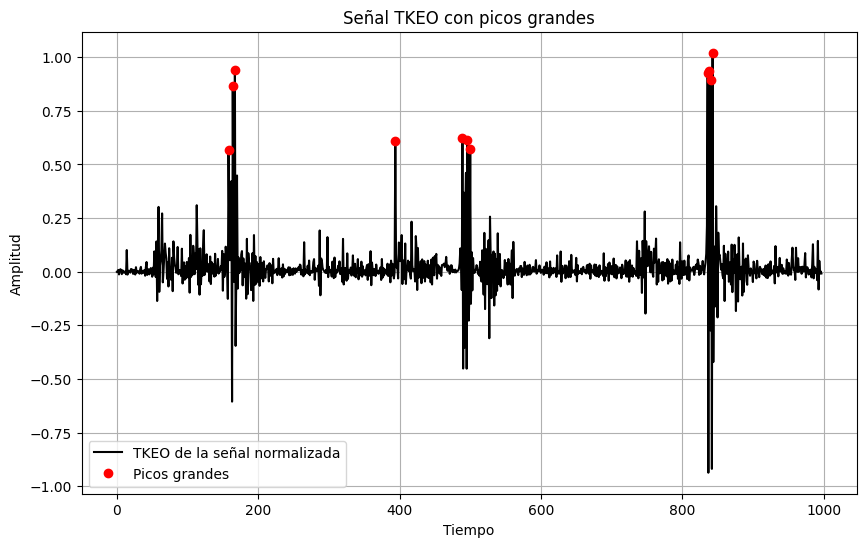

In [ ]:
def tkeo(signal): #función para aplicar el operador TKEO a una señal
    tkeo_signal = np.square(signal[1:-1]) - (signal[:-2] * signal[2:])
    return tkeo_signal

#ruta del archivo
ruta_archivo = "/content/drive/MyDrive/Datos/datos_proyecto2/sujeto1.txt"
with open(ruta_archivo, 'r') as file: #lee los datos del archivo
    datos = file.readlines()


signal = np.array([float(dato.strip()) for dato in datos]) #convertir los datos a una lista de valores numéricos
signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1 #normalizar la señal
tkeo_signal = tkeo(signal_normalized) #aplicar el operador TKEO a la señal normalizada

#encontrar los índices de los picos grandes en la señal TKEO
umbral_pico = 0.5  #umbral para considerar un pico como grande
indices_picospicos_grandes = np.where(tkeo_signal > umbral_pico)[0]

#gráfica de la señal TKEO con los picos grandes resaltados
plt.figure(figsize=(10, 6))
plt.plot(tkeo_signal, label='TKEO de la señal normalizada', color='black')
plt.plot(indices_picospicos_grandes, tkeo_signal[indices_picospicos_grandes], 'ro', label='Picos grandes')
plt.title('Señal TKEO con picos grandes')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


In [ ]:
#para confirmamr la ubicacion de los datos de los sujetos

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado"

archivos = os.listdir(carpeta_principal) #obtener la lista de archivos en la carpeta
print(archivos)

archivos[0]

['sujeto1_etiquetado.txt', 'sujeto2_etiquetado.txt', 'sujeto3_etiquetado.txt', 'sujeto4_etiquetado.txt', 'sujeto5_etiquetado.txt', 'sujeto6_etiquetado.txt', 'sujeto7_etiquetado.txt', 'sujeto8_etiquetado.txt', 'sujeto9_etiquetado.txt', 'sujeto10_etiquetado.txt']


'sujeto1_etiquetado.txt'

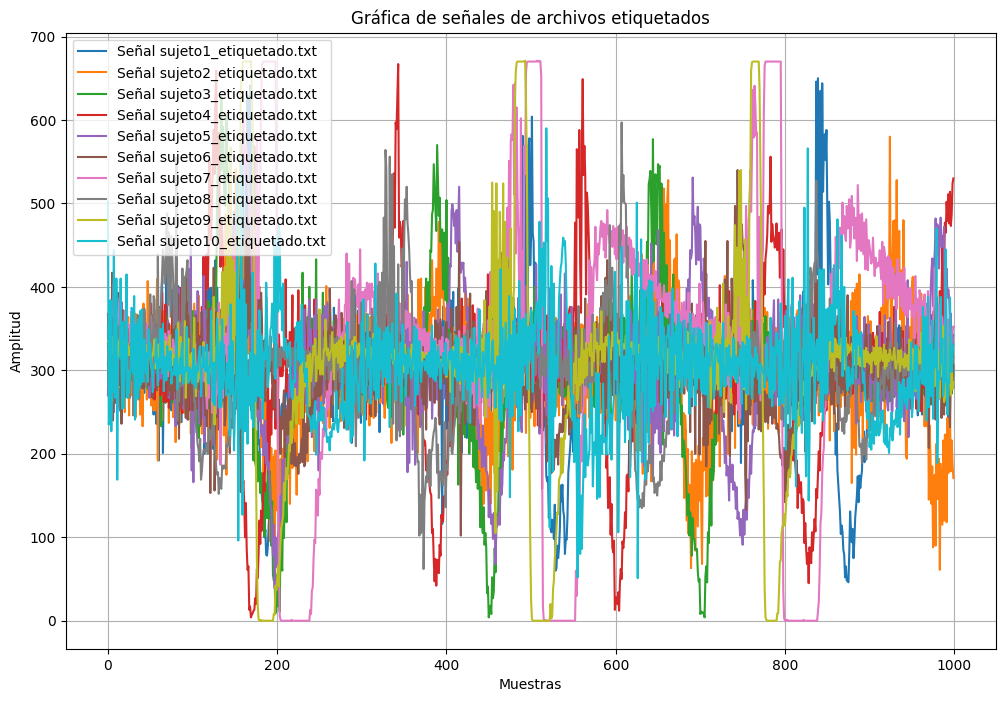

In [ ]:
carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado"
archivos = [archivo for archivo in os.listdir(carpeta_principal) if archivo.endswith('.txt')] #obtener la lista de archivos en la carpeta

plt.figure(figsize=(12, 8)) #configura la gráfica

for archivo in archivos: #iterar sobre cada archivo
    ruta_archivo = os.path.join(carpeta_principal, archivo) #ruta completa del archivo
    with open(ruta_archivo, 'r') as file: #lee los datos del archivo
        datos = file.readlines()

    #extraer la primera columna (datos de la señal)
    signal = [float(dato.strip().split()[0]) for dato in datos]

    #graficar la señal
    plt.plot(signal, label=f'Señal {archivo}')

plt.title('Gráfica de señales de archivos etiquetados')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


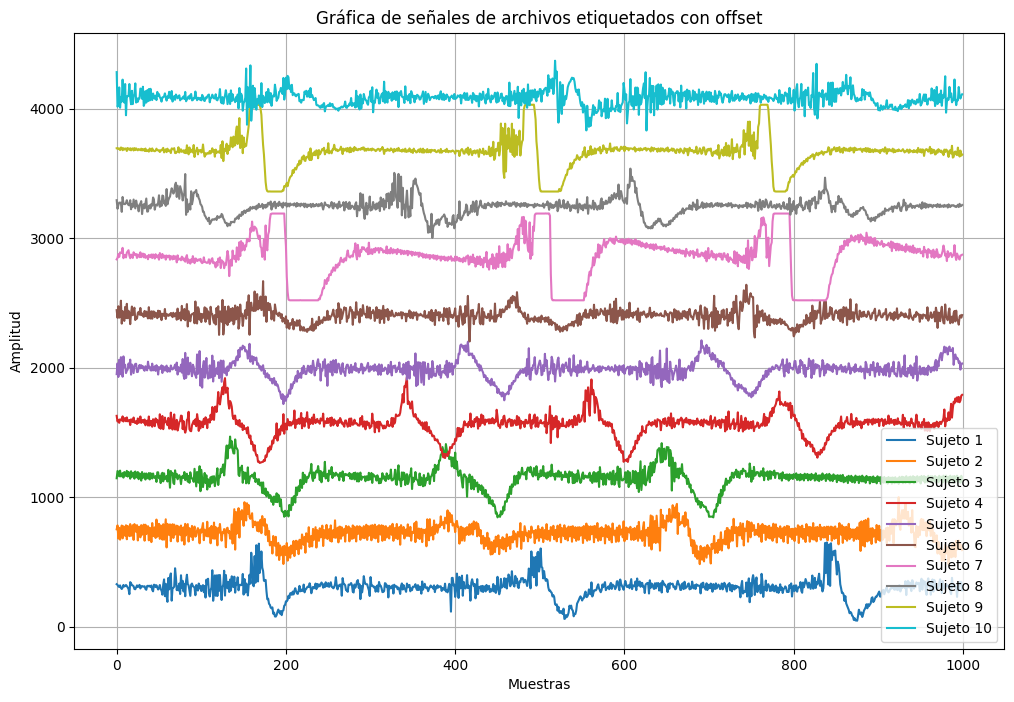

In [ ]:
#configuramos la grafica anterior con offset para tener una apreciacion mejor de las disntintas señales adquiridas

plt.figure(figsize=(12, 8)) #configura la gráfica su tamaño

for i, archivo in enumerate(archivos): #iterar sobre cada archivo
    ruta_archivo = os.path.join(carpeta_principal, archivo) #ruta completa del archivo
    with open(ruta_archivo, 'r') as file: #lee los datos del archivo
        datos = file.readlines()

    signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #extraer la primera columna (datos de la señal)

    #aplicar un offset a la señal para visualizarla mejor
    offset = 420 * i
    signal_offset = signal + offset

    #graficar la señal
    plt.plot(signal_offset, label=f'Sujeto {i+1}')

plt.title('Gráfica de señales de archivos etiquetados con offset')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

**1. Crear una función que reciba la señal de EMG y permita aplicar el operador**
---

Teager-Kaiser Energy Operator (TKEO). (10 %)

Antes de aplicar el operado, se normalizo la señal dividiendo por el valor máximo absoluto, el operador TKEO sirve para resaltar características no lineales de nuestros datos

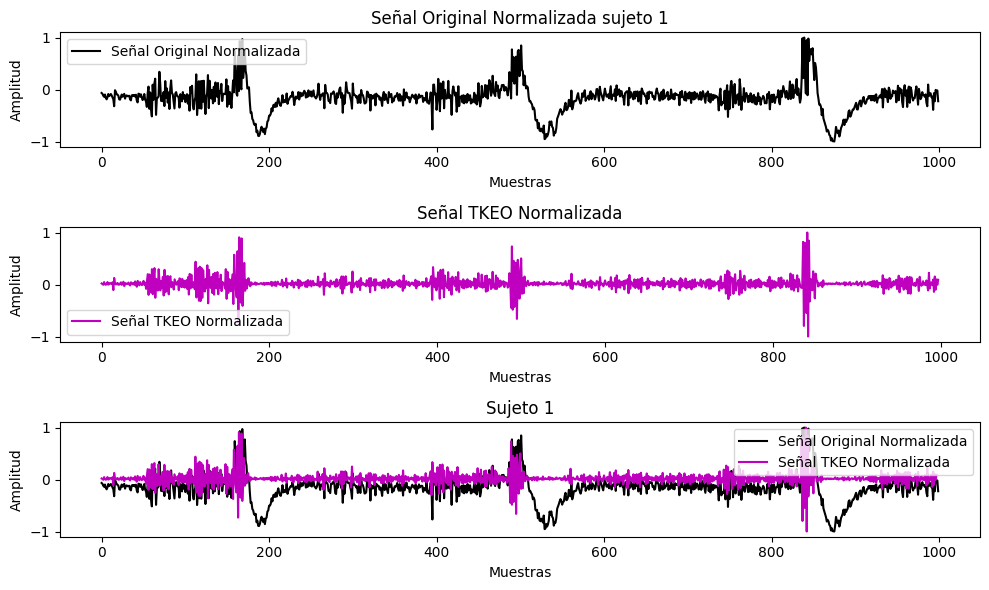

In [ ]:
def tkeo(signal): #función para aplicar el operador TKEO a una señal
    tkeo_signal = np.square(signal[1:-1]) - (signal[:-2] * signal[2:])
    return tkeo_signal


ruta_archivo = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado/sujeto1_etiquetado.txt" #ruta del archivo a procesar
with open(ruta_archivo, 'r') as file: #lee los datos del archivo
    datos = file.readlines()

#convertir los datos a una lista de valores numéricos y etiquetas de gestos
signal = np.array([float(dato.strip().split()[0]) for dato in datos])
gestos = [dato.strip().split()[1] for dato in datos]


tkeo_signal = tkeo(signal) #aplicar el operador TKEO a la señal
signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1 #normalizar la señal original y la señal TKEO
tkeo_signal_normalized = (tkeo_signal - np.min(tkeo_signal)) / (np.max(tkeo_signal) - np.min(tkeo_signal)) * 2 - 1

#graficar la señal original y la señal TKEO normalizadas
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
plt.title('Señal Original Normalizada sujeto 1')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
plt.title('Señal TKEO Normalizada')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 3)
plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
plt.title('Sujeto 1')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()



**2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal**

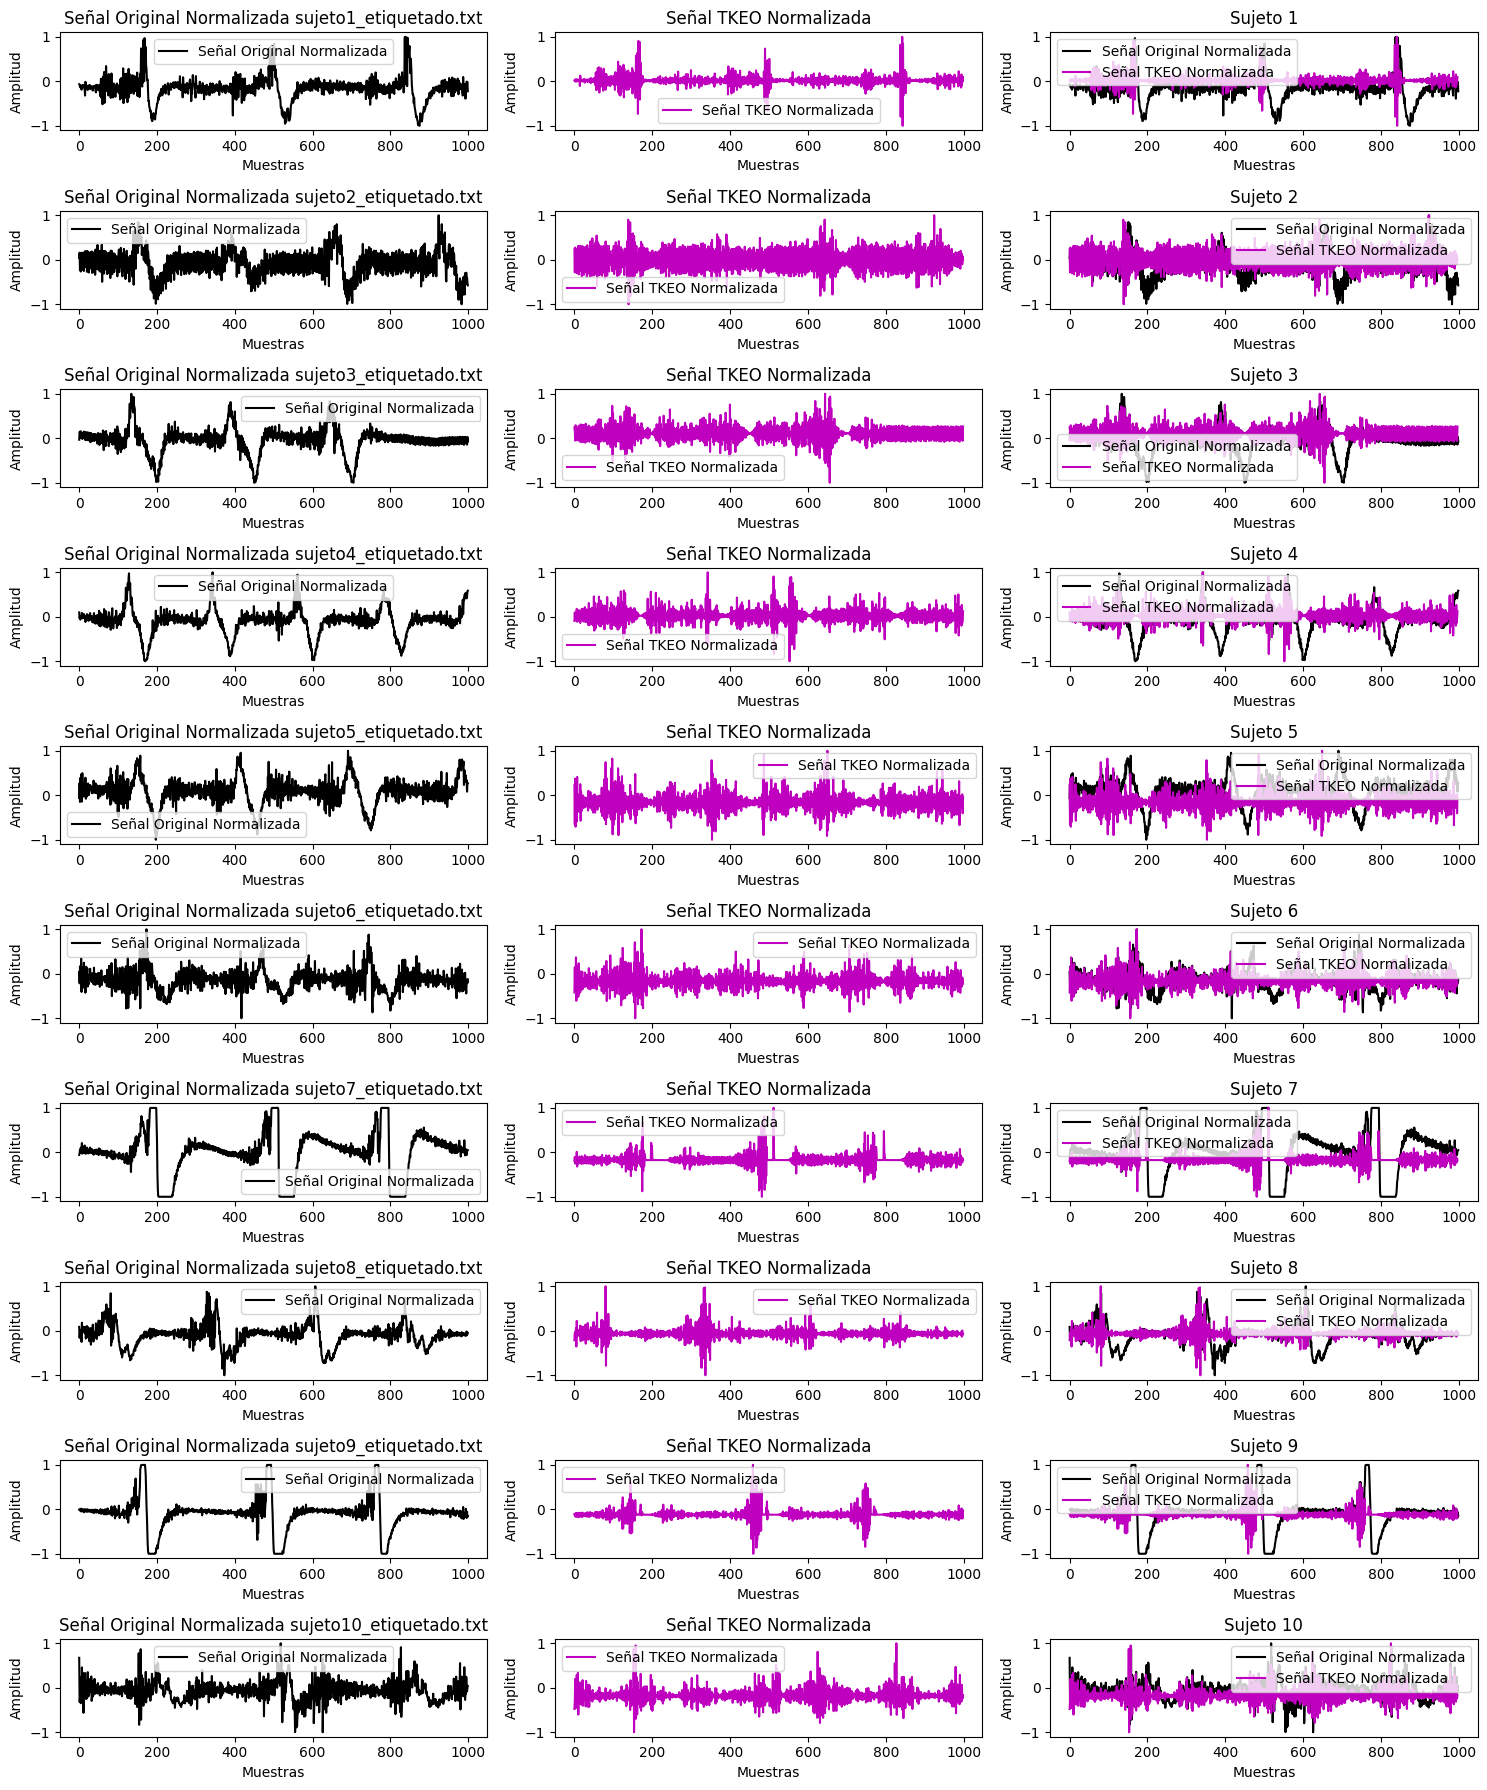

In [ ]:
#configurar la gráfica
plt.figure(figsize=(15, 18))

for i, archivo in enumerate(archivos): #iterar sobre cada archivo
    ruta_archivo = os.path.join(carpeta_principal, archivo) #construir la ruta completa del archivo

    with open(ruta_archivo, 'r') as file:  # Leer los datos del archivo
        datos = file.readlines()

    signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
    gestos = [dato.strip().split()[1] for dato in datos]

    tkeo_signal = tkeo(signal) # Aplicar el operador TKEO a la señal
    signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1 #normalizar la señal original y la señal TKEO
    tkeo_signal_normalized = (tkeo_signal - np.min(tkeo_signal)) / (np.max(tkeo_signal) - np.min(tkeo_signal)) * 2 - 1

    #fraficar la señal original y la señal TKEO normalizadas
    plt.subplot(len(archivos), 3, i*3 + 1)
    plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
    plt.title(f'Señal Original Normalizada {archivo}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(len(archivos), 3, i*3 + 2)
    plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
    plt.title('Señal TKEO Normalizada')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(len(archivos), 3, i*3 + 3)
    plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
    plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
    plt.title(f'Sujeto {i+1}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

plt.tight_layout()
plt.show()


**3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal (esto solo lo hacemos para el sujeto 1)**
--
- RMS
- Varianza
- Mean Absolute Value
- Mean Absolute Value Slope
- Slope Sign Changes
- Wave form length
- Zero Crossing



In [ ]:
def tkeo(signal):
    signal_padded = np.pad(signal, (1, 1), mode='constant', constant_values=0) #rellenar los bordes con ceros

    tkeo_signal = np.square(signal_padded[1:-1]) - (signal_padded[:-2] * signal_padded[2:]) #aplicar el operador TKEO
    return tkeo_signal

def extract_features_tkeo(signal, tkeo_signal, gestos):
    features = []
    gestos_unicos = set(gestos)

    for gesto in gestos_unicos:
        indices = [i for i, g in enumerate(gestos) if g == gesto]
        signal_gesto = signal[indices]
        tkeo_signal_gesto = tkeo_signal[indices]

        rms = np.sqrt(np.mean(signal_gesto ** 2))  #RMS
        rms_tkeo = np.sqrt(np.mean(tkeo_signal_gesto ** 2))
        varianza = np.var(signal_gesto) #varianza
        varianza_tkeo = np.var(tkeo_signal_gesto)
        mean_absolute_value = np.mean(np.abs(signal_gesto)) #mean Absolute Value
        mean_absolute_value_tkeo = np.mean(np.abs(tkeo_signal_gesto))
        diff_signal = np.diff(signal_gesto) #mean Absolute Value Slope
        diff_tkeo_signal = np.diff(tkeo_signal_gesto)
        mean_absolute_value_slope = np.mean(np.abs(diff_signal))
        mean_absolute_value_slope_tkeo = np.mean(np.abs(diff_tkeo_signal))
        slope_sign_changes = np.sum(np.abs(np.diff(np.sign(diff_signal)))) / 2 #slope Sign Changes
        slope_sign_changes_tkeo = np.sum(np.abs(np.diff(np.sign(diff_tkeo_signal)))) / 2
        wave_form_length = np.sum(np.abs(diff_signal)) # Wave form length
        wave_form_length_tkeo = np.sum(np.abs(diff_tkeo_signal))
        zero_crossing = np.sum(np.abs(np.diff(signal_gesto > 0))) / 2 #zero Crossing
        zero_crossing_tkeo = np.sum(np.abs(np.diff(tkeo_signal_gesto > 0))) / 2

        features.append([gesto, rms, varianza, mean_absolute_value, mean_absolute_value_slope, slope_sign_changes, wave_form_length, zero_crossing, rms_tkeo, varianza_tkeo, mean_absolute_value_tkeo, mean_absolute_value_slope_tkeo, slope_sign_changes_tkeo, wave_form_length_tkeo, zero_crossing_tkeo])

    return features

ruta_archivo = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado/sujeto1_etiquetado.txt" #ruta del archivo a procesa
with open(ruta_archivo, 'r') as file: #lee los datos del archivo
    datos = file.readlines()

signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convierte los datos a una lista de valores numéricos y etiquetas de gestos
gestos = [dato.strip().split()[1] for dato in datos]

tkeo_signal = tkeo(signal) #aplicar el operador TKEO a la señal
features = extract_features_tkeo(signal, tkeo_signal, gestos) #extraer las características para cada gesto

#imprimir las características
for feature in features:
    print(f"Gesto (señal con TKEO): {feature[0]}")
    print(f"RMS : {feature[8]}")
    print(f"Varianza : {feature[9]}")
    print(f"Mean Absolute Value : {feature[10]}")
    print(f"Mean Absolute Value Slope : {feature[11]}")
    print(f"Slope Sign Changes : {feature[12]}")
    print(f"Wave form length : {feature[13]}")
    print(f"Zero Crossing : {feature[14]}")

    print()

Gesto (señal con TKEO): 1
RMS : 40557.83337413291
Varianza : 1437714187.0789676
Mean Absolute Value : 23793.398821218074
Mean Absolute Value Slope : 30957.36220472441
Slope Sign Changes : 353.0
Wave form length : 15726340.0
Zero Crossing : 124.5

Gesto (señal con TKEO): 0
RMS : 45254.81609502239
Varianza : 1689021610.3349001
Mean Absolute Value : 25401.28513238289
Mean Absolute Value Slope : 30404.557142857142
Slope Sign Changes : 331.0
Wave form length : 14898233.0
Zero Crossing : 107.0



**4. Crear una rutina que aplique sobre todo los archivos de la base de datos las funciones descritas en 2 y 3**
--


In [ ]:
def process_subjects_data(folder_path):
    all_features = []

    archivos = os.listdir(folder_path)  #obtener la lista de archivos en la carpeta
    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo

        with open(ruta_archivo, 'r') as file:  #leer los datos del archivo
            datos = file.readlines()

        signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        gestos = [dato.strip().split()[1] for dato in datos]
        tkeo_signal = tkeo(signal) #alicar el operador TKEO a la señal
        features = extract_features_tkeo(signal, tkeo_signal, gestos) #extraer las características para cada gesto


        print(f"Características de la señal EMG para el archivo {archivo}:") #mensaje indicando el archivo procesado
        #imprimir las características del sujeto
        for feature in features:
            print(f"Gesto: {feature[0]}")
            print(f"RMS (TKEO): {feature[1]}")
            print(f"Varianza (TKEO): {feature[2]}")
            print(f"Mean Absolute Value (TKEO): {feature[3]}")
            print(f"Mean Absolute Value Slope (TKEO): {feature[4]}")
            print(f"Slope Sign Changes (TKEO): {feature[5]}")
            print(f"Wave form length (TKEO): {feature[6]}")
            print(f"Zero Crossing (TKEO): {feature[7]}")
            print()

        all_features.extend(features) #agregar las características del sujeto a la lista general

    return all_features

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado" #ruta de la carpeta
all_subjects_features = process_subjects_data(carpeta_principal) #procesar los datos de todos los sujetos


Características de la señal EMG para el archivo sujeto1_etiquetado.txt:
Gesto: 1
RMS (TKEO): 298.82598375277763
Varianza (TKEO): 5063.595493301322
Mean Absolute Value (TKEO): 290.229862475442
Mean Absolute Value Slope (TKEO): 40.22047244094488
Slope Sign Changes (TKEO): 321.0
Wave form length (TKEO): 20432.0
Zero Crossing (TKEO): 0.0

Gesto: 0
RMS (TKEO): 322.8615846633412
Varianza (TKEO): 7300.5901170146135
Mean Absolute Value (TKEO): 311.3503054989817
Mean Absolute Value Slope (TKEO): 40.56530612244898
Slope Sign Changes (TKEO): 310.0
Wave form length (TKEO): 19877.0
Zero Crossing (TKEO): 0.0

Características de la señal EMG para el archivo sujeto2_etiquetado.txt:
Gesto: 1
RMS (TKEO): 284.202048671845
Varianza (TKEO): 5300.3808939241035
Mean Absolute Value (TKEO): 274.7188081936685
Mean Absolute Value Slope (TKEO): 68.19962686567165
Slope Sign Changes (TKEO): 438.0
Wave form length (TKEO): 36555.0
Zero Crossing (TKEO): 0.0

Gesto: 0
RMS (TKEO): 340.7925586549055
Varianza (TKEO): 4710

**5. Crear una rutina que aplique sobre todo los archivos de la base de datos las función 3 sobre las señales originales**

In [ ]:
def extraer_caracteristicas_emg(signal_emg):

    rms = np.sqrt(np.mean(np.square(signal_emg))) #calcular RMS (Root Mean Square)
    varianza = np.var(signal_emg) #calcular Varianza
    mav = np.mean(np.abs(signal_emg)) #calcular Mean Absolute Value (MAV)
    mav_slope = np.mean(np.abs(np.diff(signal_emg))) #calcular Mean Absolute Value Slope (MAV Slope)
    diff_signal = np.diff(signal_emg) #calcular Slope Sign Changes
    ssc = np.sum(np.diff(np.sign(diff_signal)) != 0)
    wl = np.sum(np.abs(np.diff(signal_emg))) #calcular Waveform Length (WL)
    zc = np.sum(np.abs(np.diff(np.sign(signal_emg))) > 0) #calcular Zero Crossing (ZC)

    return rms, varianza, mav, mav_slope, ssc, wl, zc #devolver las características calculadas

for archivo in archivos: #iterar sobre cada archivo .txt en el directorio
    if archivo.endswith(".txt"):


        datos = np.loadtxt(ruta_archivo, dtype=str) #leer los datos del archivo
        gestos_unicos = np.unique(datos[:, 1]) #extraer los gestos únicos de la segunda columna

        print(f"Características de la señal EMG para el archivo {archivo}:")

        for gesto in gestos_unicos: #iterar sobre cada gesto único y calcular las características de la señal EMG para ese gesto
            datos_gesto = datos[datos[:, 1] == gesto][:, 0].astype(float) #filtrar los datos correspondientes al gesto actual

            #llamar a la función para extraer las características de la señal EMG para el gesto actual
            rms, varianza, mav, mav_slope, ssc, wl, zc = extraer_caracteristicas_emg(datos_gesto)

            print(f"Gesto (señal original): '{gesto}':")  #imprimir las características calculadas para el gesto actual
            print(f"RMS: {rms}")
            print(f"Varianza: {varianza}")
            print(f"Mean Absolute Value (MAV): {mav}")
            print(f"Mean Absolute Value Slope (MAV Slope): {mav_slope}")
            print(f"Slope Sign Changes (SSC): {ssc}")
            print(f"Waveform Length (WL): {wl}")
            print(f"Zero Crossing (ZC): {zc}")
            print()

        print()

Características de la señal EMG para el archivo sujeto1_etiquetado.txt:
Gesto (señal original): '0':
RMS: 322.8615846633412
Varianza: 7300.5901170146135
Mean Absolute Value (MAV): 311.3503054989817
Mean Absolute Value Slope (MAV Slope): 40.56530612244898
Slope Sign Changes (SSC): 316
Waveform Length (WL): 19877.0
Zero Crossing (ZC): 0

Gesto (señal original): '1':
RMS: 298.82598375277763
Varianza: 5063.595493301322
Mean Absolute Value (MAV): 290.229862475442
Mean Absolute Value Slope (MAV Slope): 40.22047244094488
Slope Sign Changes (SSC): 324
Waveform Length (WL): 20432.0
Zero Crossing (ZC): 0


Características de la señal EMG para el archivo sujeto2_etiquetado.txt:
Gesto (señal original): '0':
RMS: 322.8615846633412
Varianza: 7300.5901170146135
Mean Absolute Value (MAV): 311.3503054989817
Mean Absolute Value Slope (MAV Slope): 40.56530612244898
Slope Sign Changes (SSC): 316
Waveform Length (WL): 19877.0
Zero Crossing (ZC): 0

Gesto (señal original): '1':
RMS: 298.82598375277763
Varia

**6. Almanecene las métricas obtenidas en el ítem 4 y 5 en un dataframe, en donde haya una columna que discrimine si las caracteristicas proviene de una señal con TKEO o sin TKEO**
--

In [ ]:
def calculate_features(signal, tkeo_enabled=False): #función para calcular características de una señal EMG
    features = []

    rms = np.sqrt(np.mean(signal ** 2))  #calcular características comunes
    varianza = np.var(signal)
    mean_absolute_value = np.mean(np.abs(signal))
    mean_absolute_value_slope = np.mean(np.abs(np.diff(signal)))
    slope_sign_changes = np.sum(np.abs(np.diff(np.sign(np.diff(signal)))) != 0)
    wave_form_length = np.sum(np.abs(np.diff(signal)))
    zero_crossing = np.sum(np.abs(np.diff(signal > 0)))

    features.append([rms, varianza, mean_absolute_value, mean_absolute_value_slope,
                     slope_sign_changes, wave_form_length, zero_crossing, tkeo_enabled])

    return features

def process_subjects_data(folder_path): #función para procesar los datos de todos los sujetos
    all_features = []

    archivos = os.listdir(folder_path) #obtener la lista de archivos en la carpeta

    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo
        with open(ruta_archivo, 'r') as file:  #lee los datos del archivo
            datos = file.readlines()

        #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        signal = np.array([float(dato.strip().split()[0]) for dato in datos])
        gestos = [dato.strip().split()[1] for dato in datos]

        features_without_tkeo = calculate_features(signal) #calcular características sin TKEO
        tkeo_signal = tkeo(signal) #aplicar el operador TKEO a la señal
        features_with_tkeo = calculate_features(tkeo_signal, tkeo_enabled=True)  #calcular características con TKEO

        #agregar las características a la lista general
        all_features.extend(features_without_tkeo)
        all_features.extend(features_with_tkeo)

    return all_features

all_subjects_features = process_subjects_data(carpeta_principal) #procesar los datos de todos los sujetos

#crear un DataFrame con las características
columns = ["RMS", "Varianza", "Mean Absolute Value", "Mean Absolute Value Slope",
           "Slope Sign Changes", "Wave form length", "Zero Crossing", "TKEO"]
df = pd.DataFrame(all_subjects_features, columns=columns)

#mostrar el dataframe
print(df)


             RMS      Varianza  Mean Absolute Value  \
0     310.859779  6.273442e+03              300.600   
1   42928.318964  1.838937e+09            24582.871   
2     311.683400  5.895424e+03              302.078   
3   51476.232133  2.643031e+09            43099.619   
4     316.255457  8.123654e+03              303.140   
5   32341.901261  1.043955e+09            24344.386   
6     320.403560  9.273804e+03              305.589   
7   31387.959871  9.828462e+08            21573.069   
8     314.723992  5.528377e+03              305.815   
9   34403.908786  1.180656e+09            25132.084   
10    306.523089  3.062596e+03              301.486   
11  37227.160205  1.382052e+09            27128.355   
12    376.027020  2.624468e+04              339.340   
13  35623.818424  1.265475e+09            20955.669   
14    309.935040  4.373706e+03              302.797   
15  28501.215713  8.110805e+08            17058.670   
16    326.201370  1.451590e+04              303.136   
17  30728.

In [ ]:
len(df)

20

**7. Realice un análisis exploratorio de los datos (Estadística descriptiva) teniendo como base la teoría vista en clase (Diagramas de cajas, gráficos, medidas de tendencia central)**
--

<Figure size 1200x800 with 0 Axes>

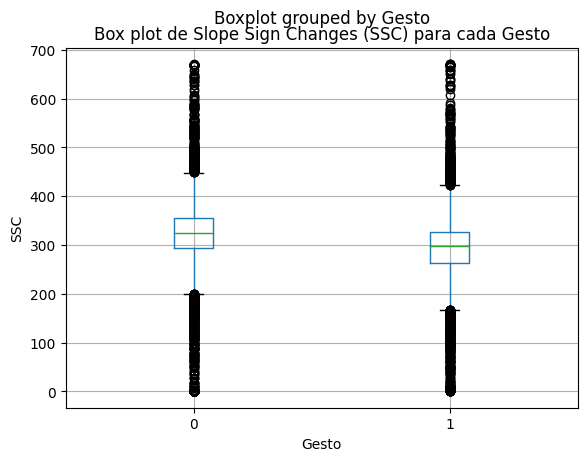

In [ ]:
def extract_ssc_class(file_path): #función para extraer el Slope Sign Changes (SSC) y los gestos de un archivo
    ssc_values = []
    gestures = []
    with open(file_path, 'r') as file: #leer los datos del archivo
        for line in file:
            values = line.strip().split()
            ssc_values.append(float(values[0]))  #valores de SSC
            gestures.append(int(values[1]))  #gesto
    return ssc_values, gestures

def process_subjects_data(folder_path): #función para procesar los datos de todos los sujetos
    all_ssc_values = []
    all_gestures = []
    archivos = os.listdir(folder_path) #obtener la lista de archivos en la carpeta

    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo
        ssc_values, gestures = extract_ssc_class(ruta_archivo) #extraer el SSC y los gestos del archivo
        all_ssc_values.extend(ssc_values) #agregar los valores y los gestos a las listas generales
        all_gestures.extend(gestures)
    return all_ssc_values, all_gestures

all_ssc_values, all_gestures = process_subjects_data(carpeta_principal) #procesar los datos de todos los sujetos
df_ssc_class = pd.DataFrame({'SSC': all_ssc_values, 'Gesto': all_gestures}) #crear un DataFrame con los datos

#generar el boxplot
plt.figure(figsize=(12, 8))
boxplot = df_ssc_class.boxplot(column='SSC', by='Gesto', vert=True)
plt.title('Box plot de Slope Sign Changes (SSC) para cada Gesto')
plt.xlabel('Gesto')
plt.ylabel('SSC')
plt.show()


Como parte del análisis estadístico se decidió hacer el boxplot del SSC (SLOPE SIGN CHANGES), para mostrar las distribuciones de cambios de signos de la pendiente para cada gesto en todos los sujetos, para lograr identificar posibles diferencias en los cambios de la dirección de la tendencia de los datos para todos los diferentes tipos de gestos.

Entre los datos de SSC para los sujetos, se puede observar que cada gesto tiene que los datos de ssc se ubica entre los limites inferiores e inferiores respecticamente, en donde no tienen el mismo valor pero tienen tienen una escala que va aumentando casi que de la misma manera entre los valores de los sujetos del ssc del gesto de extención, gesto 0.


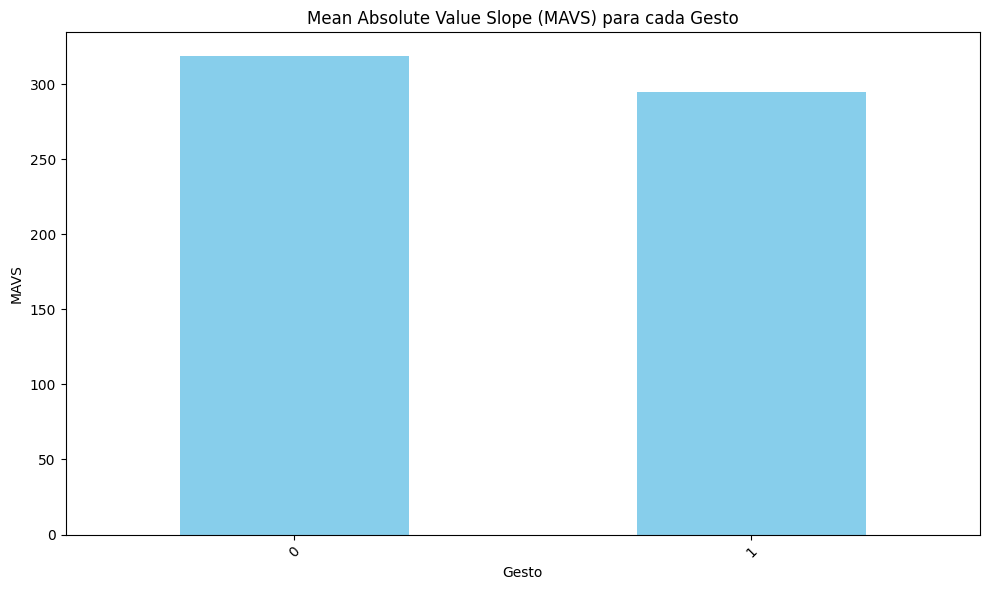

In [ ]:
#función para extraer el Mean Absolute Value Slope (MAVS) y los gestos de un archivo
def extract_mavs_class(file_path):
    mavs_values = []
    gestures = []
    # Leer los datos del archivo
    with open(file_path, 'r') as file:
        for line in file:
            values = line.strip().split()
            mavs_values.append(float(values[0]))  # Valores de MAVS
            gestures.append(int(values[1]))  # Clase (gesto)
    return mavs_values, gestures

#función para procesar los datos de todos los sujetos
def process_subjects_data(folder_path):
    all_mavs_values = []
    all_gestures = []
    archivos = os.listdir(folder_path) #cbtener la lista de archivos en la carpeta

    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo
        mavs_values, gestures = extract_mavs_class(ruta_archivo) #extraer el MAVS y los gestos del archivo
        all_mavs_values.extend(mavs_values) #agregar los valores y los gestos a las listas generales
        all_gestures.extend(gestures)
    return all_mavs_values, all_gestures

all_mavs_values, all_gestures = process_subjects_data(carpeta_principal) #procesar los datos de todos los sujetos
df_mavs_class = pd.DataFrame({'MAVS': all_mavs_values, 'Gesto': all_gestures}) #crear un DataFrame con los datos
mavs_mean_by_gesture = df_mavs_class.groupby('Gesto')['MAVS'].mean() #calcular la media del MAVS para cada gesto

#graficar el MAVS
plt.figure(figsize=(10, 6))
mavs_mean_by_gesture.plot(kind='bar', color='skyblue')
plt.title('Mean Absolute Value Slope (MAVS) para cada Gesto')
plt.xlabel('Gesto')
plt.ylabel('MAVS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Se hizo un grafico de barras para mostrar la pendiente de valor absoluto medio para cada gesto y de esta manera comparar la medida de tendencia central del MAVS, proporcionando una representación visual clara de cómo varían estas medidas en los diferentes gestos suministrados.

Teniendo en cuenta que la pendiente del valor absoluto medio indica la tendencia general de los cambios en los datos a lo largo del tiempo, en este caso de cada gesto, se puede observar que los datos están muy cercanos entre ellos, es decir que no hay una gran diferencia entre la tendencia de los cambios en las señales EMG entre los gestos.

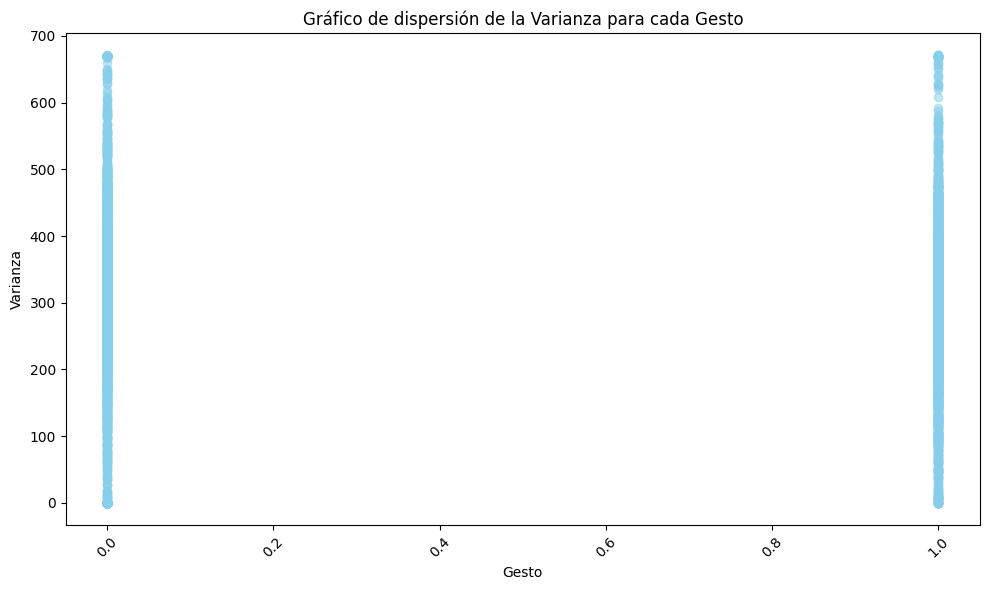

In [ ]:
def extract_variance_class(file_path):
    variance_values = []
    gestures = []
    with open(file_path, 'r') as file: #leee los datos del archivo
        for line in file:
            values = line.strip().split()
            variance_values.append(float(values[0]))  #valores de varianza
            gestures.append(int(values[1]))  #gestos
    return variance_values, gestures

#función para procesar los datos de todos los sujetos
def process_subjects_data(folder_path):
    all_variance_values = []
    all_gestures = []
    #obtener la lista de archivos en la carpeta
    archivos = os.listdir(folder_path)
    #iterar sobre cada archivo de sujeto
    for archivo in archivos:
        #construir la ruta completa del archivo
        ruta_archivo = os.path.join(folder_path, archivo)
        #extraer la varianza y los gestos del archivo
        variance_values, gestures = extract_variance_class(ruta_archivo)
        #agregar los valores y los gestos a las listas generales
        all_variance_values.extend(variance_values)
        all_gestures.extend(gestures)
    return all_variance_values, all_gestures

all_variance_values, all_gestures = process_subjects_data(carpeta_principal) #procesar los datos de todos los sujetos
df_variance_class = pd.DataFrame({'Varianza': all_variance_values, 'Gesto': all_gestures}) #crea un DataFrame con los datos

#graficar
plt.figure(figsize=(10, 6))
plt.scatter(df_variance_class['Gesto'], df_variance_class['Varianza'], color='skyblue', alpha=0.5)
plt.title('Gráfico de dispersión de la Varianza para cada Gesto')
plt.xlabel('Gesto')
plt.ylabel('Varianza')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Al analizar un gráfico de dispersión de la varianza para cada gesto se están buscando patrones de diferencias entre gestos, variabilidad entre sujetos, correlaciones con otras características y efectos temporales relacionados con la ejecución de los gestos, para lograr comprender mejor la naturaleza de la actividad muscular y la estabilidad de los gestos que estás estudiando. Como se puede observa en el grafico de dispersión entre gestos, no hay una gran diferencias entre las escalas, a pedar de que para cada gestos esta escala si va aumentando y por el lado especifico del gesto 1, hay una mayor dispersión de los datos a medida que la escala va aumentando.







**8. Prueba de Normalidad, Homocedasticidad y Prueba de Mann Whitney**
--

*Prueba de Normalidad*

In [ ]:
import numpy as np
import os
from scipy.stats import kstest

# Función para calcular el operador TKEO
def tkeo(signal):
    signal_padded = np.pad(signal, (1, 1), mode='constant', constant_values=0)
    tkeo_signal = np.square(signal_padded[1:-1]) - (signal_padded[:-2] * signal_padded[2:])
    return tkeo_signal

#función para procesar los datos de todos los sujetos y realizar la prueba de normalidad KSTest
def process_subjects_data(folder_path):
    archivos = os.listdir(folder_path) #obtener la lista de archivos en la carpeta

    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo
        with open(ruta_archivo, 'r') as file: #leer los datos del archivo
            datos = file.readlines()

        #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        signal = np.array([float(dato.strip().split()[0]) for dato in datos])
        gestos = [dato.strip().split()[1] for dato in datos]
        tkeo_signal = tkeo(signal) #calcular el operador TKEO para la señal

        for gesto in set(gestos):  #realizar la prueba de normalidad KSTest para cada gesto con TKEO
            indices = [i for i, g in enumerate(gestos) if g == gesto]
            tkeo_signal_gesto = tkeo_signal[indices]
            kstest_result = kstest(tkeo_signal_gesto, 'norm')
            print(f"Sujeto: {archivo}, Gesto: {gesto}, Estadístico KS: {kstest_result.statistic}, P-valor: {kstest_result.pvalue}")
            if kstest_result.pvalue > 0.05:
                print("Distribución: Normal")
            else:
                print("Distribución: No Normal")
            print()

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado" #ruta de la carpeta que contiene los archivos de datos de todos los sujetos
process_subjects_data(carpeta_principal) #procesar los datos de todos los sujetos y realizar la prueba de normalidad KSTest


Sujeto: sujeto1_etiquetado.txt, Gesto: 1, Estadístico KS: 0.719056687808153, P-valor: 2.797752638344587e-267
Distribución: No Normal

Sujeto: sujeto1_etiquetado.txt, Gesto: 0, Estadístico KS: 0.7494908350305499, P-valor: 1.0566894557810292e-285
Distribución: No Normal

Sujeto: sujeto2_etiquetado.txt, Gesto: 1, Estadístico KS: 0.7113594040968343, P-valor: 1.0869850555941607e-274
Distribución: No Normal

Sujeto: sujeto2_etiquetado.txt, Gesto: 0, Estadístico KS: 0.8293736501079914, P-valor: 0.0
Distribución: No Normal

Sujeto: sujeto3_etiquetado.txt, Gesto: 1, Estadístico KS: 0.7208413001912046, P-valor: 2.7928192887170138e-276
Distribución: No Normal

Sujeto: sujeto3_etiquetado.txt, Gesto: 0, Estadístico KS: 0.7945492662473794, P-valor: 4e-323
Distribución: No Normal

Sujeto: sujeto4_etiquetado.txt, Gesto: 1, Estadístico KS: 0.7537108307133091, P-valor: 1.496252880869212e-291
Distribución: No Normal

Sujeto: sujeto4_etiquetado.txt, Gesto: 0, Estadístico KS: 0.7411067193675889, P-valor: 3

*Prueba de Homocedasticidad*

In [ ]:
import numpy as np
import os
from itertools import combinations
from scipy.stats import levene

# Función para calcular el operador TKEO
def tkeo(signal):
    signal_padded = np.pad(signal, (1, 1), mode='constant', constant_values=0)
    tkeo_signal = np.square(signal_padded[1:-1]) - (signal_padded[:-2] * signal_padded[2:])
    return tkeo_signal

def process_subjects_data(folder_path): #función para procesar los datos de los sujetos y realizar la prueba de homocedasticidad Levene para pares de sujetos
    archivos = os.listdir(folder_path) #obtener la lista de archivos en la carpeta
    tkeo_signals_por_sujeto = {} #crear un diccionario para almacenar las señales TKEO por gesto para cada sujeto

    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo
        with open(ruta_archivo, 'r') as file: #leer los datos del archivo
            datos = file.readlines()

        signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        gestos = [dato.strip().split()[1] for dato in datos]
        tkeo_signal = tkeo(signal) #calcular el operador TKEO para la señal

        #almacenar las señales TKEO por gesto para cada sujeto
        for gesto in set(gestos):
            indices = [i for i, g in enumerate(gestos) if g == gesto]
            tkeo_signals_por_sujeto.setdefault(gesto, []).append(tkeo_signal[indices])

    for gesto, signals in tkeo_signals_por_sujeto.items(): #realizar la prueba de homocedasticidad Levene comparando pares de sujetos para cada gesto
        print(f"----------------- Para Gesto: {gesto}----------------")
        print(" ")
        for sujeto1, sujeto2 in combinations(range(len(signals)), 2):  #comparar pares de sujetos
            signal1 = signals[sujeto1]
            signal2 = signals[sujeto2]
            levene_result = levene(signal1, signal2)
            print(f"Sujetos: {archivos[sujeto1]} y {archivos[sujeto2]}")
            print(f"Estadístico de Levene: {levene_result.statistic}, P-valor: {levene_result.pvalue}")
            if levene_result.pvalue > 0.05:
                print("Homocedasticidad: Sí")
            else:
                print("Homocedasticidad: No")
            print()

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado" #ruta de la carpeta que contiene los archivos de datos de todos los sujetos
process_subjects_data(carpeta_principal) #procesar los datos de los sujetos y realizar la prueba de homocedasticidad Levene para pares de sujetos


----------------- Para Gesto: 1----------------
 
Sujetos: sujeto1_etiquetado.txt y sujeto2_etiquetado.txt
Estadístico de Levene: 46.82102747883384, P-valor: 1.3233178943623895e-11
Homocedasticidad: No

Sujetos: sujeto1_etiquetado.txt y sujeto3_etiquetado.txt
Estadístico de Levene: 0.44376766342802554, P-valor: 0.5054587168391241
Homocedasticidad: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto4_etiquetado.txt
Estadístico de Levene: 7.517642198555101, P-valor: 0.006218689082938395
Homocedasticidad: No

Sujetos: sujeto1_etiquetado.txt y sujeto5_etiquetado.txt
Estadístico de Levene: 0.9805967013905954, P-valor: 0.32228569117785566
Homocedasticidad: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto6_etiquetado.txt
Estadístico de Levene: 0.030567191083111178, P-valor: 0.8612443817212874
Homocedasticidad: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto7_etiquetado.txt
Estadístico de Levene: 0.44605670549059384, P-valor: 0.504375921676852
Homocedasticidad: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto8_

*Prueba de Mann Whitney*

In [ ]:
import numpy as np
import os
from itertools import combinations
from scipy.stats import mannwhitneyu

# Función para calcular el operador TKEO
def tkeo(signal):
    signal_padded = np.pad(signal, (1, 1), mode='constant', constant_values=0)
    tkeo_signal = np.square(signal_padded[1:-1]) - (signal_padded[:-2] * signal_padded[2:])
    return tkeo_signal

def process_subjects_data(folder_path): #función para procesar los datos de los sujetos y realizar la prueba de Mann-Whitney para pares de sujetos
    archivos = os.listdir(folder_path) #obtener la lista de archivos en la carpeta
    tkeo_signals_por_sujeto = {} #crear un diccionario para almacenar las señales TKEO por gesto para cada sujeto

    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo
        with open(ruta_archivo, 'r') as file: #leeer los datos del archivo
            datos = file.readlines()

        signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        gestos = [dato.strip().split()[1] for dato in datos]
        tkeo_signal = tkeo(signal)  #calcular el operador TKEO para la señal

        for gesto in set(gestos): #almacenar las señales TKEO por gesto para cada sujeto
            indices = [i for i, g in enumerate(gestos) if g == gesto]
            tkeo_signals_por_sujeto.setdefault(gesto, []).append(tkeo_signal[indices])

    for gesto, signals in tkeo_signals_por_sujeto.items(): #realizar la prueba de Mann-Whitney comparando pares de sujetos para cada gesto
        print(f"Gesto: {gesto}")
        for sujeto1, sujeto2 in combinations(range(len(signals)), 2): #comparar pares de sujetos
            signal1 = signals[sujeto1]
            signal2 = signals[sujeto2]
            mwu_result = mannwhitneyu(signal1, signal2, alternative='two-sided')
            print(f"Sujetos: {archivos[sujeto1]} y {archivos[sujeto2]}")
            print(f"Estadístico de Mann-Whitney U: {mwu_result.statistic}, P-valor: {mwu_result.pvalue}")
            if mwu_result.pvalue < 0.05:
                print("Diferencia significativa: Sí")
            else:
                print("Diferencia significativa: No")
            print()

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado" #ruta de la carpeta que contiene los archivos
process_subjects_data(carpeta_principal) #procesar los datos de los sujetos


Gesto: 1
Sujetos: sujeto1_etiquetado.txt y sujeto2_etiquetado.txt
Estadístico de Mann-Whitney U: 170011.5, P-valor: 8.608821485792961e-12
Diferencia significativa: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto3_etiquetado.txt
Estadístico de Mann-Whitney U: 143897.0, P-valor: 0.02415733280930508
Diferencia significativa: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto4_etiquetado.txt
Estadístico de Mann-Whitney U: 130269.0, P-valor: 0.32167508688430413
Diferencia significativa: No

Sujetos: sujeto1_etiquetado.txt y sujeto5_etiquetado.txt
Estadístico de Mann-Whitney U: 140533.5, P-valor: 0.051925830628475736
Diferencia significativa: No

Sujetos: sujeto1_etiquetado.txt y sujeto6_etiquetado.txt
Estadístico de Mann-Whitney U: 142259.0, P-valor: 0.004679292178027869
Diferencia significativa: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto7_etiquetado.txt
Estadístico de Mann-Whitney U: 116661.5, P-valor: 0.3233870371349108
Diferencia significativa: No

Sujetos: sujeto1_etiquetado.txt y sujeto8_etiq

Respecto a  la **independencia** de los datos, en este caso utilizamos 10 sujetos diferentes con contextura diferente por lo tanto asumimos que este parametro se cumple en el proyecto.

Las **pruebas de hipótesis**  nos permiten determinar si hay suficiente evidencia para rechazar una hipótesis nula (H0). El valor p indica la probabilidad de obtener los resultados observados si la H0 fuera verdadera. En este caso tenemos que
H0 = Las caracteristicas de cada sujeto respecto a sus gestos sigue una distribucion normal
H1 = Las caracteristicas de cada sujeto respecto a sus gestos no siguen una distribucion normal

En los resultados de esta prueba podemos observar que para ningun sujeto se presento una distribucion normal, como analizamos en el informe del proyecto, tenemos que contemplar que aunque estamos realizando un protocolo de accion para los movimientos del experimento, tenemos muchos factores que no podemos controlar, desde el brillo hasta los cambios fisiiologicos y de coordinacion de las personas, desde que evaluamos las caracteristicas de cada sujeto por separado podemos deducir que hay una gran dispersion de los datos y variaciones inesperadas que se ven reflejadas en estas pruebas.

En cuanto a la **prueba de homocedasticidad:** Los resultados de la prueba de Levene indican que se puede rechazar la hipótesis nula de homogeneidad de varianza entre las características extraídas para cada gesto y sujeto. Esto implica que las varianzas de estas características son estadísticamente diferentes dentro de cada gesto.

Debido a que no se cumplieron todos los supuestos necesarios para pruebas paramétricas, se optó por una prueba no paramétrica de Mann-Whitney. Esta prueba permite analizar datos en escala nominal con observaciones independientes.

En cuanto a la **prueba de Mann-Whitney: **

H0: Las distribuciones de los datos de gestos iguales comparados en distintos sujetos son diferentes
H1: Las distribuciones de los datos de gestos iguales comparados en distintos sujetos son iguales

Se comparan las distribuciones de los datos de gestos iguales entre diferentes sujetos como ya lo hemos hecho en el proyecto anterior, sin embargo para este experimento los resultados muestran que para la mayoría de los gestos y características hay diferencias significativas entre los sujetos y las señales EMG NO son consistentes entre sujetos






***Conclusion***

Es fundamental reconocer la importancia de adquirir habilidades en la técnica de toma de EMG y comprender qué esperar al realizar estas mediciones, la variabilidad esta vez fue muy grande y tenemos varios fundamentos para pensar que en los valores obtenidos pueden estar influenciandos por diversos factores, como la colocación de los electrodos, la calidad de la señal, la técnica de medición y la anatomía individual. Aprender a realizar correctamente las mediciones de EMG es crucial para garantizar la precisión y fiabilidad de los datos recopilados,si comprendemos mejor estos aspectos y adquirimos experiencia en la toma de mediciones de señales fisiologicas se puede mejorar la calidad de los datos obtenidos y obtener resultados más precisos y significativos en futuras investigaciones que pueden evolucionar y hasta ayudar a diagonosticos